<a href="https://colab.research.google.com/github/mbatiasonic/Drone_MiniProject/blob/main/Drone_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MINI PROJECT

##Samuel Mbatia Gachana

###TITLE : Using Canopy Height Model (CHM) to Assess the Forest Structure of a Reforested Stand.

###ABSTRACT
This project presents a pipeline for assessing forest structure in a reforested area using high-resolution drone imagery and derived digital surface and elevation models (DSM and DEM). By computing the Canopy Height Model (CHM), individual treetops were detected through local maxima analysis, and tree crowns were delineated using a watershed segmentation algorithm. From each segmented crown, quantitative metrics including maximum and mean tree height, crown area, and crown diameter were extracted, and results were aggregated to provide stand-level forest structure information. All outputs were converted to vector polygons and a CSV file compatible with GIS for further spatial analysis. This pipeline demonstrates a scalable approach for detailed forest monitoring, offering tree-level structural data to support reforestation assessment, forest management, and ecological research.


###1️⃣ Introduction

Reforestation has emerged as a critical nature-based solution for mitigating climate change, combating biodiversity loss, and restoring degraded ecosystems. However, the success of these initiatives is often measured by the sheer number of seedlings planted, leaving a significant gap in understanding their long-term ecological development. This project, "Assessing the Forest Structure of a Reforested Stand in Kenya," seeks to address this gap by moving beyond simple survival metrics to provide a quantitative analysis of the emerging forest's architecture. By examining key structural parameters—such as tree density, height distribution, basal area, and species diversity—within a reforested area of Kenya, this study aims to evaluate the progress of the stand towards a complex, self-sustaining ecosystem. The findings are crucial for validating restoration techniques, informing adaptive management strategies, and ultimately ensuring that reforestation efforts deliver meaningful and lasting environmental benefits for the region.

This notebook uses drone imagery and associated digital surface/elevation models (DSM/DEM) to analyze forest structure in a reforested area. The workflow leverages two custom Python modules:

* access.py – for loading, processing, and visualizing raster datasets, including orthophotos, DSM, DEM, and derived Canopy Height Model (CHM).

* assess.py – for assessing forest structure, segmenting individual tree crowns, extracting crown metrics, and saving results as vector polygons.


The notebook below is Organized as follows:

* Introduction
* access.py Data Loading and visualization
* STEP ONE
* STEP TWO
* STEP THREE
* STEP FOUR
* assess.py Forest Structure Assessment
* Conclusion
* References



In [1]:
# Clone your repo (replace with your repo URL)
!git clone https://github.com/mbatiasonic/Drone_MiniProject.git


Cloning into 'Drone_MiniProject'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 98 (delta 44), reused 23 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 18.32 MiB | 14.18 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:

# Mount Google Drive

from google.colab import drive
import os

In [3]:
!pip install rasterio
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 66.8 MB/s eta 0:00:00


In [4]:
import sys
sys.path.append("/content/Drone_MiniProject")  # adjust path if needed

In [5]:
import fynesse
from fynesse import access

##2️⃣ access.py – Data Loading and Visualization

Functions:
load_rasters(orthophoto_path, dsm_path, dem_path)

* Purpose: Loads the orthophoto, DSM, and DEM raster files into memory.

* Inputs: File paths for the orthophoto, DSM, and DEM.

* Outputs: Numpy arrays for each raster, plus a rasterio profile (metadata) for georeferencing.

* Reasoning: This function standardizes the loading process and ensures that metadata (CRS, transform, nodata) are preserved for downstream analysis.

generate_chm(dsm, dem)

* Purpose: Computes the Canopy Height Model (CHM) by subtracting the DEM from the DSM: CHM = DSM – DEM.

* Outputs: 2D array representing tree heights.

* Reasoning: The CHM represents the vertical structure of the forest and is the primary dataset for tree detection and crown segmentation.

Visualization Functions:

* visualize_dem(dem, profile) – Displays the DEM with correct elevation values and spatial extent.

* visualize_dsm(dsm, profile) – Displays the DSM similarly.

* visualize_chm(chm, profile) – Visualizes tree heights in the CHM.

* visualize_orthophoto(orthophoto) – Shows the RGB orthophoto in true colors.

* Methods Used: matplotlib.pyplot.imshow() for plotting raster arrays and rasterio.plot.plotting_extent to maintain georeferencing.

* Reasoning: Visualization is critical to validate that raster values and spatial extent are correct. Masking nodata values ensures blank areas do not dominate the display.

In [6]:
from fynesse.access import (
    load_rasters,
    generate_chm,
    visualize_dem,
    visualize_dsm,
    visualize_chm,
    visualize_orthophoto
)


##STEP ONE

Step one included the acquiring of the datasets. The datasets include ;

* 🌍 DEM → ground elevation

* 🌲 DSM → surface elevation (including vegetation/buildings)

* 🌳 CHM → tree height (derived DSM – DEM)

* 🖼 Orthophoto → true-color RGB

* To be able to ascertain the extent and see how the dataset looks in the eye, there was visualization of the dataset.

In [7]:
# Paths
#The orthophoto size is around 360 MB which will be shareable as a link
orthophoto_path = "/content/drive/MyDrive/Drone_Mini_Project/Task-of-2025-09-22T124407747Z-all/odm_orthophoto/odm_orthophoto.tif"
dsm_path = "/content/Drone_MiniProject/Data/dsm.tif"
dem_path = "/content/drive/MyDrive/Drone_Mini_Project/Task-of-2025-09-22T124407747Z-all/odm_dem/dtm.tif"

# Load rasters
orthophoto, dsm, dem, profile = access.load_rasters(
    orthophoto_path, dsm_path, dem_path
)

# Generate CHM
chm = access.generate_chm(dsm, dem)

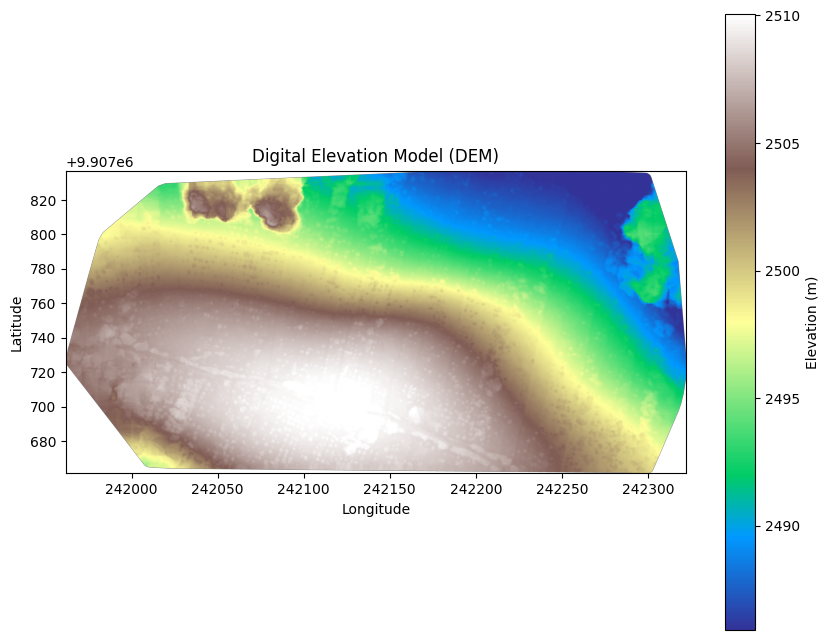

In [8]:
# Visualize
access.visualize_dem(dem, profile)

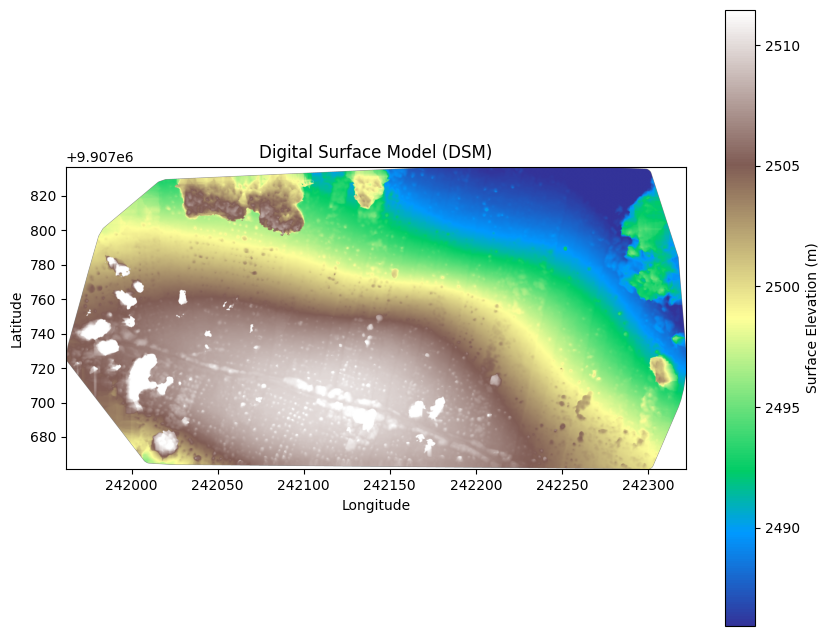

In [9]:
access.visualize_dsm(dsm, profile)

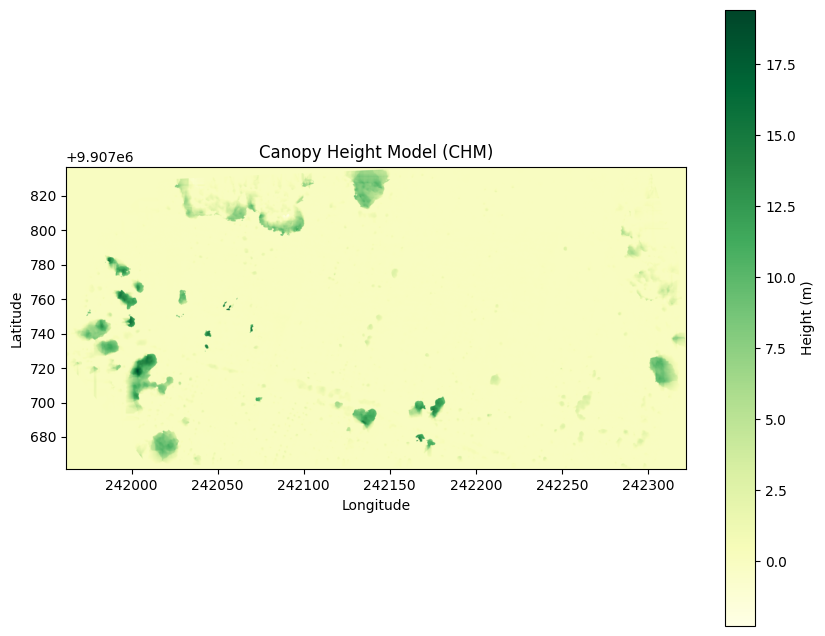

In [10]:
access.visualize_chm(chm, profile)

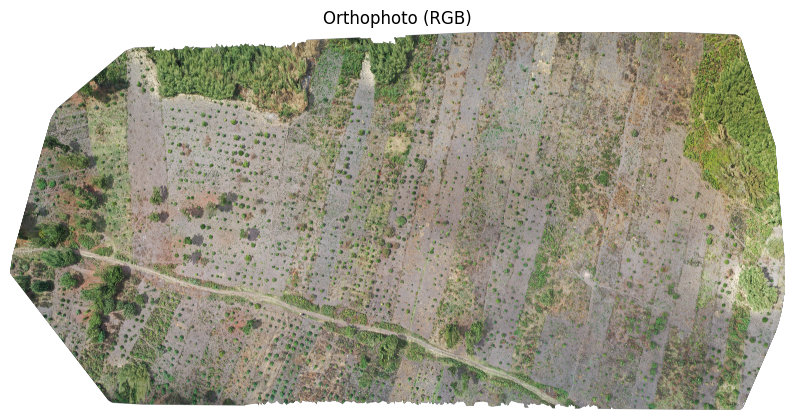

In [11]:
access.visualize_orthophoto(orthophoto)


![Descriptive Alt Text](https://drive.google.com/uc?export=download&id=1YhKQd4wkqtWWvgiT62bE5irTMea9Iwo_)

##STEP TWO
The assessment of forest structure using drone imagery and associated raster datasets begins with the derivation of the Canopy Height Model (CHM). The CHM is a raster representing the vertical structure of vegetation and is computed by subtracting the Digital Elevation Model (DEM), which represents the bare earth surface, from the Digital Surface Model (DSM), which captures the elevation of the ground plus any objects on it such as trees and buildings. Mathematically, this is expressed as:

***CHM = DSM - DEM***


This model isolates vegetation height from the underlying terrain, allowing for the identification of individual trees within a forested area. Within the CHM, local maxima are used to approximate the positions of tree apices. Local maxima are pixels whose values are higher than all neighboring pixels within a specified distance. Detecting these maxima is crucial for identifying potential tree tops and serves as the starting point for tree crown segmentation. Methods such as the peak_local_max function from the scikit-image library are commonly used for this purpose (Vincent & Soille, 1991; Dalponte & Coomes, 2016).



##STEP THREE

After detecting tree tops, the watershed segmentation algorithm is applied to delineate individual tree crowns. The CHM is treated analogously to a topographic surface, where peaks correspond to tree apices and valleys represent gaps between crowns. Watershed segmentation conceptually “floods” the CHM from the identified peaks, allowing regions to expand until they meet neighboring crowns. This approach is particularly effective in dense forests with uneven canopy structure, as it can separate closely spaced crowns and handle irregular shapes (Beucher & Meyer, 1993; Popescu et al., 2002).

Once crowns are delineated as discrete polygons, crown metrics are computed to quantify tree-level attributes. Each polygon corresponds to a single tree crown, and within each polygon, CHM pixels are analyzed to derive maximum and mean tree heights. The crown area is calculated as the total area of pixels within the polygon:


***Crown Area = Number of pixels × (pixel resolution)²***



The crown diameter is often approximated as the diameter of a circle with equivalent area:

***Crown Diameter = 2 × √(Crown Area / π)***
	​


These metrics are essential for understanding tree size, growth, and overall forest structure.

Integration with orthophoto data provides additional spectral information that can refine crown segmentation and enable species differentiation. Orthophotos are high-resolution, georeferenced aerial images in which the RGB channels can be analyzed to distinguish species based on color and spectral signature differences (Féret et al., 2018). This is particularly useful when trees of different species are adjacent but may have similar height profiles.

##STEP FOUR

Finally, aggregating tree-level metrics allows for stand-level analysis, which provides insights into forest density, mean and median crown size, and structural complexity. Tree density is calculated as the number of detected trees divided by the area of the forest stand. Structural complexity indices, such as the coefficient of variation of tree heights or crown size distribution, provide information on forest heterogeneity, which is important for biodiversity assessment and monitoring reforestation success (Zhou et al., 2019). This workflow thus enables a scalable, quantitative assessment of forest structure, supporting forest management, ecological monitoring, and conservation efforts.

##3️⃣ assess.py – Forest Structure Assessment



1. Detect tree tops (local maxima)

* Function: detect_tree_tops(chm, min_distance=3)

* Uses skimage.feature.peak_local_max to find the highest points in the CHM (typically tree tops).

* Reasoning: Local maxima represent the approximate location of individual trees; required as markers for segmentation.

2. Segment tree crowns

* Function: segment_tree_crowns(chm, orthophoto=None)

* Uses a watershed algorithm seeded with detected tree tops.

* Optional: orthophoto can be used to refine crown boundaries based on spectral differences.

* Reasoning: Watershed is a robust region-growing method for separating adjacent crowns in dense forests.

3. Convert raster crowns to polygons

* Function: crowns_to_polygons(labeled_crowns, profile, min_area=1)

* Converts labeled crown raster to vector polygons (Shapefile compatible).

* Reasoning: Vector polygons allow spatial analysis, aggregation, and integration with GIS software.

4. Compute crown metrics

* Function: compute_crown_metrics(gdf, chm, profile)

* Calculates:

* Maximum and mean tree height

* Crown area

* Crown diameter (approximated as circle-equivalent)

* Reasoning: Quantitative metrics are necessary for understanding forest structure, including tree density, size distribution, and growth dynamics.

5. Full workflow

* Function: assess_forest_structure(chm, profile, orthophoto=None)

* Integrates detection → segmentation → polygon conversion → metric extraction.

* Outputs: GeoDataFrame with tree-level polygons and metrics.

* Reasoning: Provides a complete pipeline from raster data to actionable forest inventory metrics.

6. Export results

* Function: save_crowns_shapefile(gdf, output_path)

* Saves the tree crowns as a Shapefile, compatible with GIS software.

* Reasoning: Enables further spatial analysis and reporting.

In [12]:
from fynesse import assess, access

# Load rasters
orthophoto, dsm, dem, profile = access.load_rasters(
    orthophoto_path, dsm_path, dem_path
)
chm = access.generate_chm(dsm, dem)

# Assess forest structure
tree_gdf = assess.assess_forest_structure(chm, profile, orthophoto=orthophoto)

# Save as shapefile
assess.save_crowns_shapefile(tree_gdf, "/content/Drone_MiniProject/Output/tree_crowns.shp")

# Inspect metrics
tree_gdf.head()


/content/Drone_MiniProject/fynesse/assess.py:269: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_path)
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'mean_height' to 'mean_heigh'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'crown_diameter' to 'crown_diam'
  ogr_write(


,crown_id,geometry,max_height,mean_height,crown_area,crown_diameter
0,2818.0,"POLYGON ((242208.57 9907836.31, 242208.57 9907...",0.401855,0.108779,1.2725,1.272870
1,836.0,"POLYGON ((242149.47 9907835.16, 242149.47 9907...",4.727051,2.068908,1.2575,1.265345
2,3082.0,"POLYGON ((242168.42 9907835.76, 242168.42 9907...",0.327148,0.073617,1.4675,1.366923
3,720.0,"POLYGON ((242141.72 9907834.81, 242141.72 9907...",5.676270,5.391404,1.0600,1.161737
4,697.0,"POLYGON ((242131.77 9907834.36, 242131.77 9907...",5.937256,5.403979,1.5375,1.399145


In [13]:
len(tree_gdf)

2480

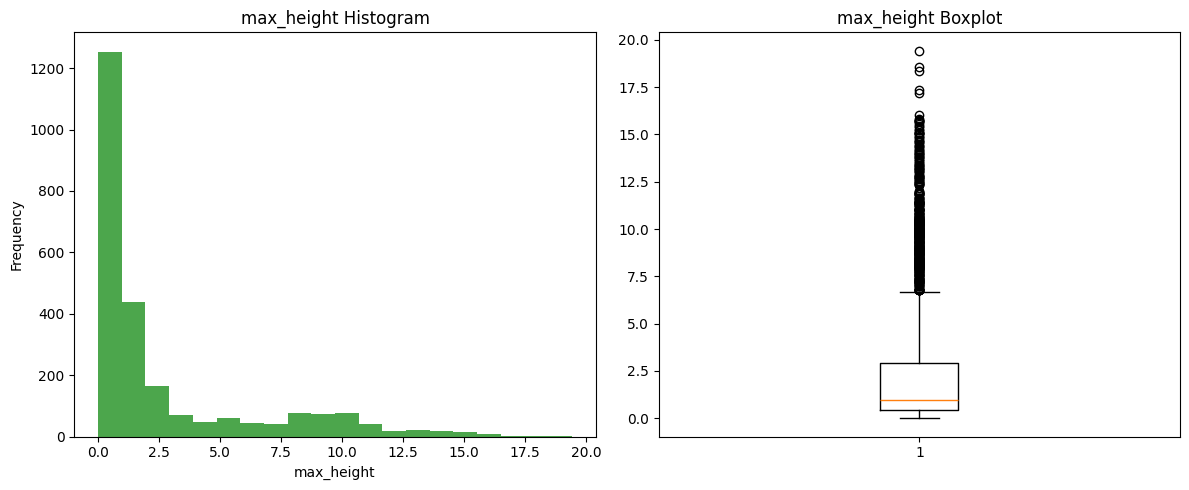

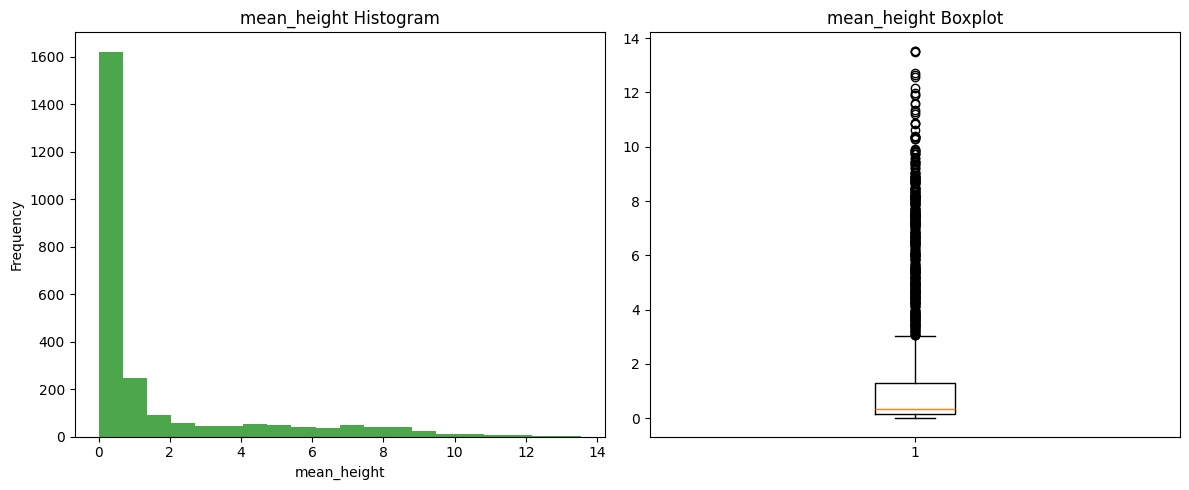

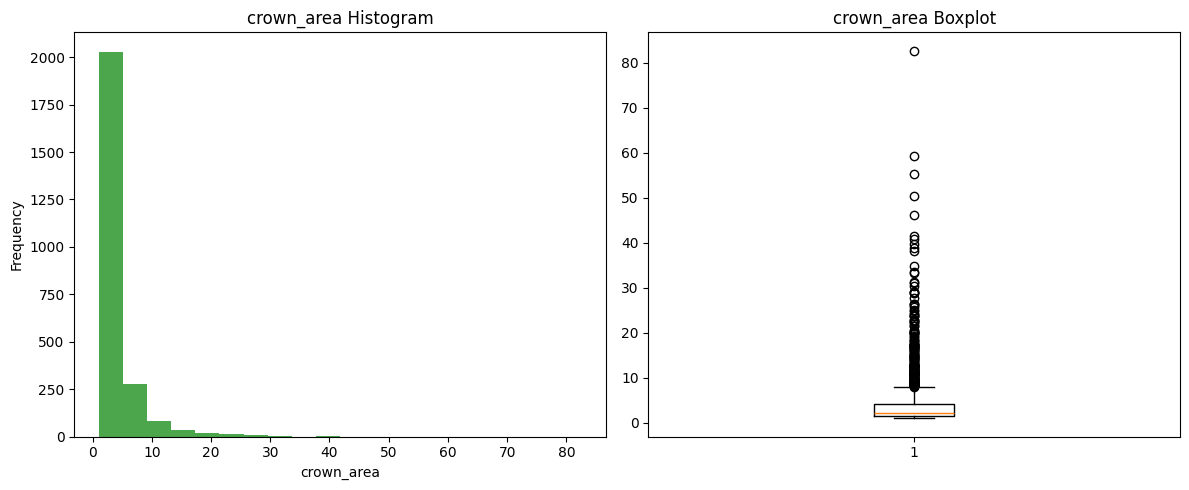

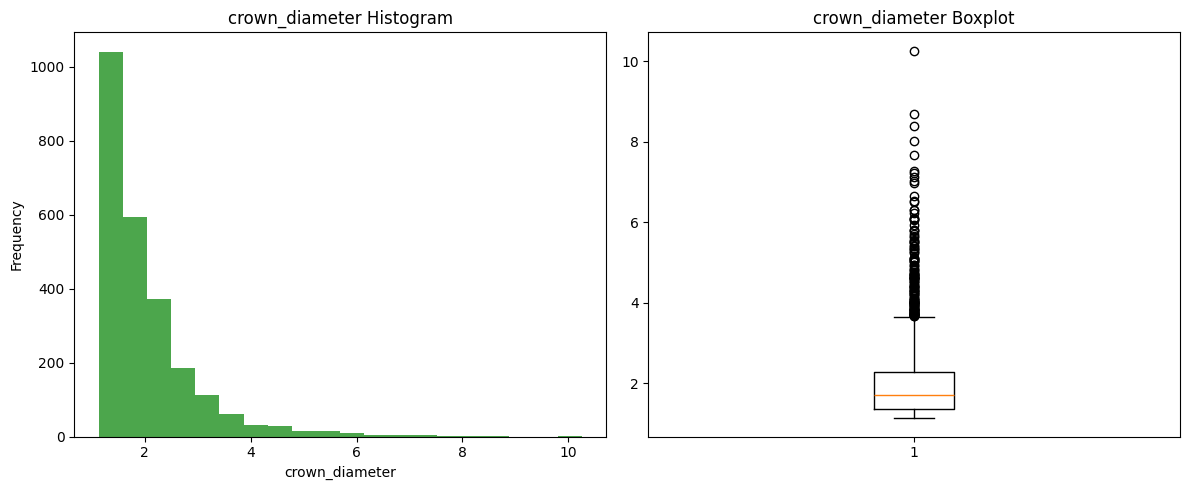

In [15]:
# # Overlay GDF on orthophoto
# import matplotlib.pyplot as plt
# assess.plot_gdf_on_orthophoto(tree_gdf, orthophoto, profile)

# Save metrics to CSV
assess.save_gdf_to_csv(tree_gdf, "/content/Drone_MiniProject/Output/tree_crowns_metrics.csv")

# Visualize crown metrics
assess.plot_crown_metrics(tree_gdf)

##Conclusion

In conclusion, the assessment of the reforested stand in Kenya provides a vital snapshot of restoration in progress, revealing the nascent development of a functional forest structure. The data collected offers more than just an inventory; it serves as a benchmark for measuring future growth and a tool for evaluating the effectiveness of the restoration methodology employed. The findings underscore the importance of moving from planting trees to cultivating ecosystems, highlighting the need for continued monitoring and care. This study not only contributes valuable insights for the specific management of this Kenyan site but also reinforces the broader principle that successful reforestation is a long-term commitment. By understanding and nurturing the structural complexity of these young forests, we can better ensure they mature into resilient havens for biodiversity and robust carbon sinks for generations to come.

##References
References

1. Beucher, S., & Meyer, F. (1993). The morphological approach to segmentation: The watershed transformation. Mathematical Morphology in Image Processing, 433–481.

2. Dalponte, M., & Coomes, D. A. (2016). Tree-centric mapping of forest carbon density from airborne laser scanning and hyperspectral data. Methods in Ecology and Evolution, 7(10), 1236–1245.

3. Féret, J.-B., Asner, G. P., & Ustin, S. L. (2018). Advanced remote sensing techniques for tree species mapping. Remote Sensing of Environment, 210, 61–76.

4. Popescu, S. C., Wynne, R. H., & Nelson, R. F. (2002). Estimating plot-level tree heights with lidar: Local filtering with a canopy-height based variable window. Computers and Electronics in Agriculture, 37(1-3), 71–95.

5. Vincent, L., & Soille, P. (1991). Watersheds in digital spaces: An efficient algorithm based on immersion simulations. IEEE Transactions on Pattern Analysis and Machine Intelligence, 13(6), 583–598.

6. Zhou, J., Tang, Z., et al. (2019). Forest structure and species diversity: Implications for biodiversity monitoring. Forest Ecology and Management, 432, 789–800